# Using t-test for testing significance of Glucose Treatment in Diabetes 

In [1]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_treatment.csv")

In [3]:
df.head()

,GlucoseTreatment,HbA1c.Baseline,HbA1c.Followup,Female,Age,BMI,SBP
0,True,7.3,6.7,True,65,32.34,139
1,False,7.9,5.8,True,56,31.64,142
2,True,13.3,9.2,False,51,35.39,164
3,False,8.5,9.0,True,46,28.48,124
4,False,11.5,9.7,True,51,36.05,139


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 7 columns):
GlucoseTreatment    520 non-null bool
HbA1c.Baseline      520 non-null float64
HbA1c.Followup      520 non-null float64
Female              520 non-null bool
Age                 520 non-null int64
BMI                 520 non-null float64
SBP                 520 non-null int64
dtypes: bool(2), float64(3), int64(2)
memory usage: 21.4 KB


In [5]:
# calculate the change in HbA1c for treatment and no glucose treatment

df['HbA1c.Change'] = df['HbA1c.Followup'] - df['HbA1c.Baseline'] 
df.head()

,GlucoseTreatment,HbA1c.Baseline,HbA1c.Followup,Female,Age,BMI,SBP,HbA1c.Change
0,True,7.3,6.7,True,65,32.34,139,-0.6
1,False,7.9,5.8,True,56,31.64,142,-2.1
2,True,13.3,9.2,False,51,35.39,164,-4.1
3,False,8.5,9.0,True,46,28.48,124,0.5
4,False,11.5,9.7,True,51,36.05,139,-1.8


## Test to see if the change in HbA1c is significantly different between patients that received the glucose treatment and the mean of the population.

In [6]:
# create a new dataframe for patients that have had the glucose treatment

df_gt = df[df['GlucoseTreatment'] == True]
df_gt.head()

,GlucoseTreatment,HbA1c.Baseline,HbA1c.Followup,Female,Age,BMI,SBP,HbA1c.Change
0,True,7.3,6.7,True,65,32.34,139,-0.6
2,True,13.3,9.2,False,51,35.39,164,-4.1
5,True,7.8,7.3,False,43,32.08,124,-0.5
8,True,7.4,6.0,False,51,32.53,130,-1.4
9,True,8.1,7.3,False,62,29.70,134,-0.8


In [7]:
df_gt['HbA1c.Change'].describe()

count    278.000000
mean      -0.896043
std        1.609118
min       -5.100000
25%       -1.900000
50%       -0.900000
75%        0.175000
max        4.000000
Name: HbA1c.Change, dtype: float64

### https://seaborn.pydata.org/generated/seaborn.histplot.html

Text(0, 0.5, 'Frequency')

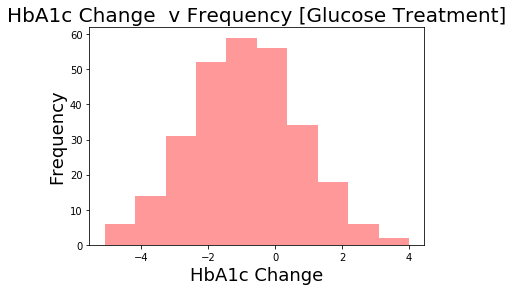

In [8]:
# create a histogram to look at the type of distribution as we need to know if it is normal distribution
# this is just the histogram for the change in HbA1c change for just patients who had the glucose treatment

sns.distplot(df_gt['HbA1c.Change'], kde=False, color='red', bins=10)
plt.title('HbA1c Change  v Frequency [Glucose Treatment]', fontsize=20)
plt.xlabel('HbA1c Change', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

In [9]:
# we can test for normality of the distribution as well

stats.shapiro(df_gt['HbA1c.Change'])

(0.9971803426742554, 0.911409854888916)

### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [10]:
# now we can do a one sample t-test on this data to see if the mean of the distribution is significantly different to zero

stats.ttest_1samp(df_gt['HbA1c.Change'], popmean=0)

Ttest_1sampResult(statistic=-9.284602358707453, pvalue=4.90192572610703e-18)

## Test to see if the change in HbA1c is significantly different between patients that received the glucose treatment and those that did not receive it.

In [11]:
# create a new dataframe for those patients that did NOT receive the Glucose Treatment

df_Nogt = df[df['GlucoseTreatment'] == False]
df_Nogt.head()

,GlucoseTreatment,HbA1c.Baseline,HbA1c.Followup,Female,Age,BMI,SBP,HbA1c.Change
1,False,7.9,5.8,True,56,31.64,142,-2.1
3,False,8.5,9.0,True,46,28.48,124,0.5
4,False,11.5,9.7,True,51,36.05,139,-1.8
6,False,10.1,7.0,False,38,28.74,118,-3.1
7,False,11.0,10.5,True,51,33.03,129,-0.5


In [12]:
df_Nogt['HbA1c.Change'].describe()

count    242.000000
mean      -0.874793
std        1.714348
min       -5.200000
25%       -2.200000
50%       -0.700000
75%        0.200000
max        4.100000
Name: HbA1c.Change, dtype: float64

Text(0, 0.5, 'Frequency')

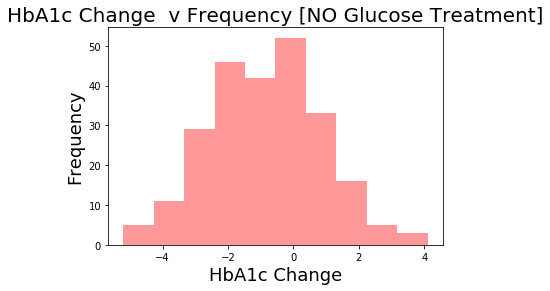

In [13]:
sns.distplot(df_Nogt['HbA1c.Change'], kde=False, color='red', bins=10)
plt.title('HbA1c Change  v Frequency [NO Glucose Treatment]', fontsize=20)
plt.xlabel('HbA1c Change', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

In [14]:
df_gt['HbA1c.Change'].describe()

count    278.000000
mean      -0.896043
std        1.609118
min       -5.100000
25%       -1.900000
50%       -0.900000
75%        0.175000
max        4.000000
Name: HbA1c.Change, dtype: float64

In [15]:
df_Nogt['HbA1c.Change'].describe()

count    242.000000
mean      -0.874793
std        1.714348
min       -5.200000
25%       -2.200000
50%       -0.700000
75%        0.200000
max        4.100000
Name: HbA1c.Change, dtype: float64

## Get a visualalization of the difference in change between Treatment and No Treatment

### https://seaborn.pydata.org/generated/seaborn.boxplot.html

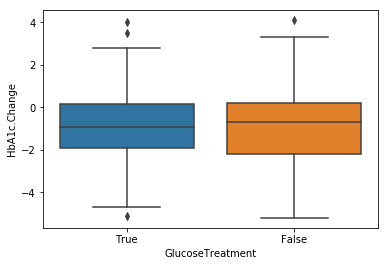

In [16]:
# NOTE: noticet hat we are using the original dataframe df for doing this! as we are compating both Treatment/no treatment

ax = sns.boxplot(x='GlucoseTreatment', y='HbA1c.Change', data=df, order=[True, False])

### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [17]:
# we are going to do a 2 sample t-test for independence here instead of paired t-test as looking at change in each group

stats.ttest_ind(df_gt['HbA1c.Change'], df_Nogt['HbA1c.Change'])

Ttest_indResult(statistic=-0.14570039250445976, pvalue=0.8842145899113226)

## Alternative way to do this using Researchpy

### https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [18]:

rp.ttest(df_gt['HbA1c.Change'], df_Nogt['HbA1c.Change'])

(       Variable      N      Mean        SD        SE  95% Conf.  Interval
 0  HbA1c.Change  278.0 -0.896043  1.609118  0.096509  -1.086026 -0.706060
 1  HbA1c.Change  242.0 -0.874793  1.714348  0.110202  -1.091876 -0.657710
 2      combined  520.0 -0.886154  1.657342  0.072679  -1.028936 -0.743372,
                             Independent t-test   results
 0  Difference (HbA1c.Change - HbA1c.Change) =    -0.0212
 1                        Degrees of freedom =   518.0000
 2                                         t =    -0.1457
 3                     Two side test p value =     0.8842
 4                    Difference < 0 p value =     0.4421
 5                    Difference > 0 p value =     0.5579
 6                                 Cohen's d =    -0.0128
 7                                 Hedge's g =    -0.0128
 8                             Glass's delta =    -0.0132
 9                                         r =     0.0064)

In [19]:
# we can return two python objects des = description, res = results

des, res = rp.ttest(df_gt['HbA1c.Change'], df_Nogt['HbA1c.Change'])

des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,HbA1c.Change,278.0,-0.896043,1.609118,0.096509,-1.086026,-0.706060
1,HbA1c.Change,242.0,-0.874793,1.714348,0.110202,-1.091876,-0.657710
2,combined,520.0,-0.886154,1.657342,0.072679,-1.028936,-0.743372


In [20]:
res

,Independent t-test,results
0,Difference (HbA1c.Change - HbA1c.Change) =,-0.0212
1,Degrees of freedom =,518.0000
2,t =,-0.1457
3,Two side test p value =,0.8842
4,Difference < 0 p value =,0.4421
5,Difference > 0 p value =,0.5579
6,Cohen's d =,-0.0128
7,Hedge's g =,-0.0128
8,Glass's delta =,-0.0132
9,r =,0.0064
